In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense
from tensorflow.keras.layers import Flatten, Dropout
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
Train_csv = "Dataset/Train.csv"
Test_csv = "Dataset/Test.csv"
Meta_csv = "Dataset/Meta.csv"

Train_images = "Dataset/Train"
Test_images = "Dataset/Test"
Meta_images = "Dataset/Meta"

In [3]:
for i in os.listdir(Train_images):
    length = len(os.listdir(Train_images +'/'+ str(i)))
    print("Total No of Images in label {} are {} Images".format(i,length))

Total No of Images in label 0 are 210 Images
Total No of Images in label 1 are 2220 Images
Total No of Images in label 10 are 2010 Images
Total No of Images in label 11 are 1320 Images
Total No of Images in label 12 are 2100 Images
Total No of Images in label 13 are 2160 Images
Total No of Images in label 14 are 780 Images
Total No of Images in label 15 are 630 Images
Total No of Images in label 16 are 420 Images
Total No of Images in label 17 are 1110 Images
Total No of Images in label 18 are 1200 Images
Total No of Images in label 19 are 210 Images
Total No of Images in label 2 are 2250 Images
Total No of Images in label 20 are 360 Images
Total No of Images in label 21 are 330 Images
Total No of Images in label 22 are 390 Images
Total No of Images in label 23 are 510 Images
Total No of Images in label 24 are 270 Images
Total No of Images in label 25 are 1500 Images
Total No of Images in label 26 are 600 Images
Total No of Images in label 27 are 240 Images
Total No of Images in label 

In [4]:
print("Total No of Test Images: ",len(os.listdir(Test_images)))

Total No of Test Images:  12631


In [5]:
print("Total No of Images in Meta",len(os.listdir(Meta_images)))

Total No of Images in Meta 43


In [6]:
df_train = pd.read_csv(Train_csv)
df_train.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [7]:
classes = len(df_train['ClassId'].unique())
print("Total Classes: ",classes)

Total Classes:  43


In [8]:
df_img = df_train.sample(frac=1)
df_img = df_img.head()

In [9]:
df_img

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
12653,48,50,6,5,43,45,8,Train/8/00008_00016_00023.png
31305,49,51,6,6,44,46,28,Train/28/00028_00016_00015.png
14543,63,63,6,6,58,58,9,Train/9/00009_00032_00023.png
34421,36,36,6,6,31,31,35,Train/35/00035_00007_00012.png
34560,33,34,6,6,28,29,35,Train/35/00035_00012_00001.png


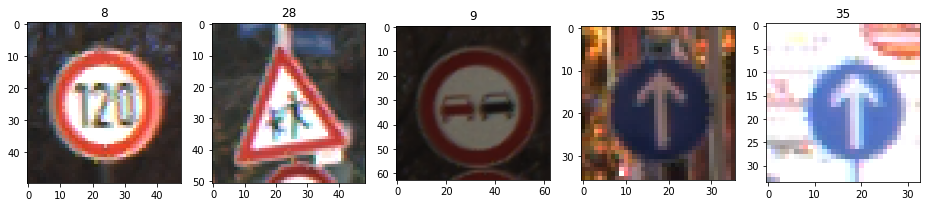

In [10]:
plt.figure(figsize=(16,9))
for i in range(5):
    plt.subplot(2,5,i+1)
    img = plt.imread("Dataset/"+df_img.iloc[i][7])
    plt.title(df_img.iloc[i][6])
    plt.imshow(img)

In [11]:
Train_images +"/"+ "0"

'Dataset/Train/0'

In [12]:
labels= []
data = []
for i in range(classes):
    path = Train_images +"/"+ str(i)
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path+"/"+a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [13]:
data = np.array(data)
labels = np.array(labels)

In [14]:
np.save("Data",data)
np.save("Target",labels)

In [15]:
X_train,X_test,y_train,y_test = train_test_split(data,labels,
                                                 test_size=0.2,
                                                random_state=0)

In [16]:
y_train.shape

(31367,)

In [17]:
X_test.shape

(7842, 30, 30, 3)

In [18]:
X_train.shape

(31367, 30, 30, 3)

In [19]:
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)

In [20]:
es = EarlyStopping(monitor='accuracy', mode='auto', verbose=1, patience=5, min_delta=0.01)

In [21]:
model = Sequential([
    Conv2D(filters=32,kernel_size=(5,5),activation='relu',input_shape=(30,30,3)),
    Conv2D(filters=32,kernel_size=(5,5),activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
    Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.25),
    Dense(43,activation='softmax')
])

In [22]:
model.compile(optimizer='adam',loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
history = model.fit(X_train,y_train,epochs=50,
              validation_data=(X_test,y_test),callbacks=[es])

Epoch 1/50
981/981 [==============================] - 22s 17ms/step - loss: 1.8018 - accuracy: 0.5332 - val_loss: 0.4815 - val_accuracy: 0.8699
Epoch 2/50
981/981 [==============================] - 16s 16ms/step - loss: 0.5547 - accuracy: 0.8363 - val_loss: 0.2153 - val_accuracy: 0.9374
Epoch 3/50
981/981 [==============================] - 13s 14ms/step - loss: 0.3350 - accuracy: 0.9028 - val_loss: 0.1130 - val_accuracy: 0.9674
Epoch 4/50
981/981 [==============================] - 13s 13ms/step - loss: 0.2331 - accuracy: 0.9332 - val_loss: 0.0938 - val_accuracy: 0.9756
Epoch 5/50
981/981 [==============================] - 13s 13ms/step - loss: 0.2088 - accuracy: 0.9429 - val_loss: 0.0729 - val_accuracy: 0.9792
Epoch 6/50
981/981 [==============================] - 13s 13ms/step - loss: 0.1765 - accuracy: 0.9507 - val_loss: 0.0754 - val_accuracy: 0.9804
Epoch 7/50
981/981 [==============================] - 12s 13ms/step - loss: 0.1499 - accuracy: 0.9600 - val_loss: 0.1319 - val_accuracy:

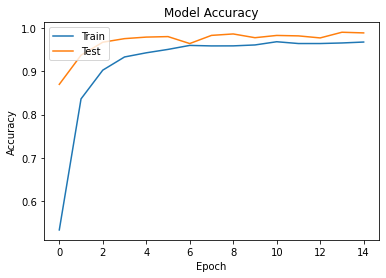

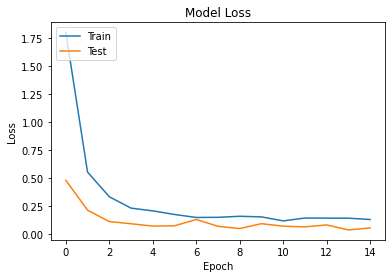

In [24]:
#Training
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train','Test'],loc='upper left')
plt.show()
#Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [26]:
model.save("Mymodel.h5")

In [25]:
model.save("./saved_model/")

INFO:tensorflow:Assets written to: ./saved_model/assets


# Converting to tflite

## without quantization

In [27]:
converter = tf.lite.TFLiteConverter.from_saved_model("./saved_model")
tflite_model = converter.convert()

In [28]:
len(tflite_model)

973168

## With quantization¶


In [29]:
converter = tf.lite.TFLiteConverter.from_saved_model("./saved_model")
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

In [30]:
len(tflite_quant_model)

252224

In [31]:
with open("tflite_model.tflite", "wb") as f:
    f.write(tflite_model)

In [32]:
with open("tflite_quant_model.tflite", "wb") as f:
    f.write(tflite_quant_model)

## Predicting Some Images

In [39]:
df_test = pd.read_csv(Test_csv)
df_test.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [42]:
df_test['Path'] = 'Dataset/'+df_test['Path']
df_test.head(2)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Dataset/Test/00000.png
1,42,45,5,5,36,40,1,Dataset/Test/00001.png


In [52]:
def testimg(testcsv):
    y_test = testcsv
    label = y_test['ClassId'].values
    imgs = y_test['Path'].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test = np.array(data)
    return X_test,label

In [54]:
X_test,label = testimg(df_test)

In [55]:
y_pred = model.predict_classes(X_test)
y_pred

C:\Users\Gitesh\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(label,y_pred)

0.956769596199525

In [62]:
label[0]

16

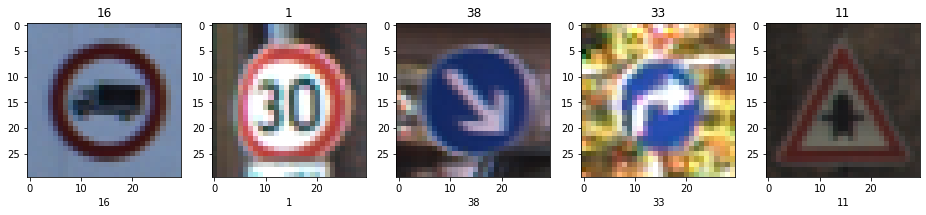

In [67]:
plt.figure(figsize=(16,9))
for i in range(5):
    plt.subplot(2,5,i+1)
    img = Image.fromarray(X_test[i])
    plt.imshow(img)
    plt.title(label[i])
    plt.xlabel(y_pred[i])